In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv(r"insurance\insurance.csv")

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [48]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


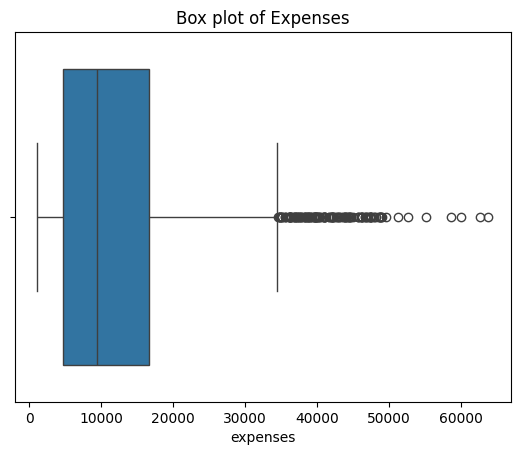

In [49]:
sns.boxplot(x = df['expenses'])
plt.title('Box plot of Expenses')
plt.xlabel('expenses')
plt.show()

In [50]:
quan25, quan75 = df['expenses'].quantile(0.25), df['expenses'].quantile(0.75)
up_bound = quan75 + 1.5*(quan75 - quan25)
up_bound

np.float64(34489.35625)

In [51]:
quan99 = df['expenses'].quantile(0.995)
quan99

np.float64(50086.98350000009)

In [52]:
df['expenses'] = np.where(df['expenses'] > quan99, quan99, df['expenses'])


In [53]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13230.610997
std,14.049960,6.098382,1.205493,11971.124165
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,50086.983500


In [54]:
df = pd.get_dummies(df, columns=['sex', 'region'])


In [56]:
df['sex_male'] = df['sex_male'].astype(int)
df['sex_female'] = df['sex_female'].astype(int)
df['region_northeast'] = df['region_northeast'].astype(int)
df['region_northwest'] = df['region_northwest'].astype(int)
df['region_southeast'] = df['region_southeast'].astype(int)
df['region_southwest'] = df['region_southwest'].astype(int)


In [57]:
df['smoker'] = df['smoker'].map({'yes': 1.0, 'no':0.0})

In [58]:
df.head()

,age,bmi,children,smoker,expenses,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1.0,16884.92,1,0,0,0,0,1
1,18,33.8,1,0.0,1725.55,0,1,0,0,1,0
2,28,33.0,3,0.0,4449.46,0,1,0,0,1,0
3,33,22.7,0,0.0,21984.47,0,1,0,1,0,0
4,32,28.9,0,0.0,3866.86,0,1,0,1,0,0


In [59]:
df['sex_female'].value_counts()

sex_female
0    676
1    662
Name: count, dtype: int64

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [61]:
df.head()

,age,bmi,children,smoker,expenses,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453646,-0.908614,1.970587,0.305374,1.010519,-1.010519,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.514186,-0.078767,-0.507463,-0.961427,-0.989591,0.989591,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.382954,1.580926,-0.507463,-0.733802,-0.989591,0.989591,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,-1.306650,-0.908614,-0.507463,0.731521,-0.989591,0.989591,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,-0.289606,-0.908614,-0.507463,-0.782487,-0.989591,0.989591,-0.565267,1.765481,-0.611324,-0.566418


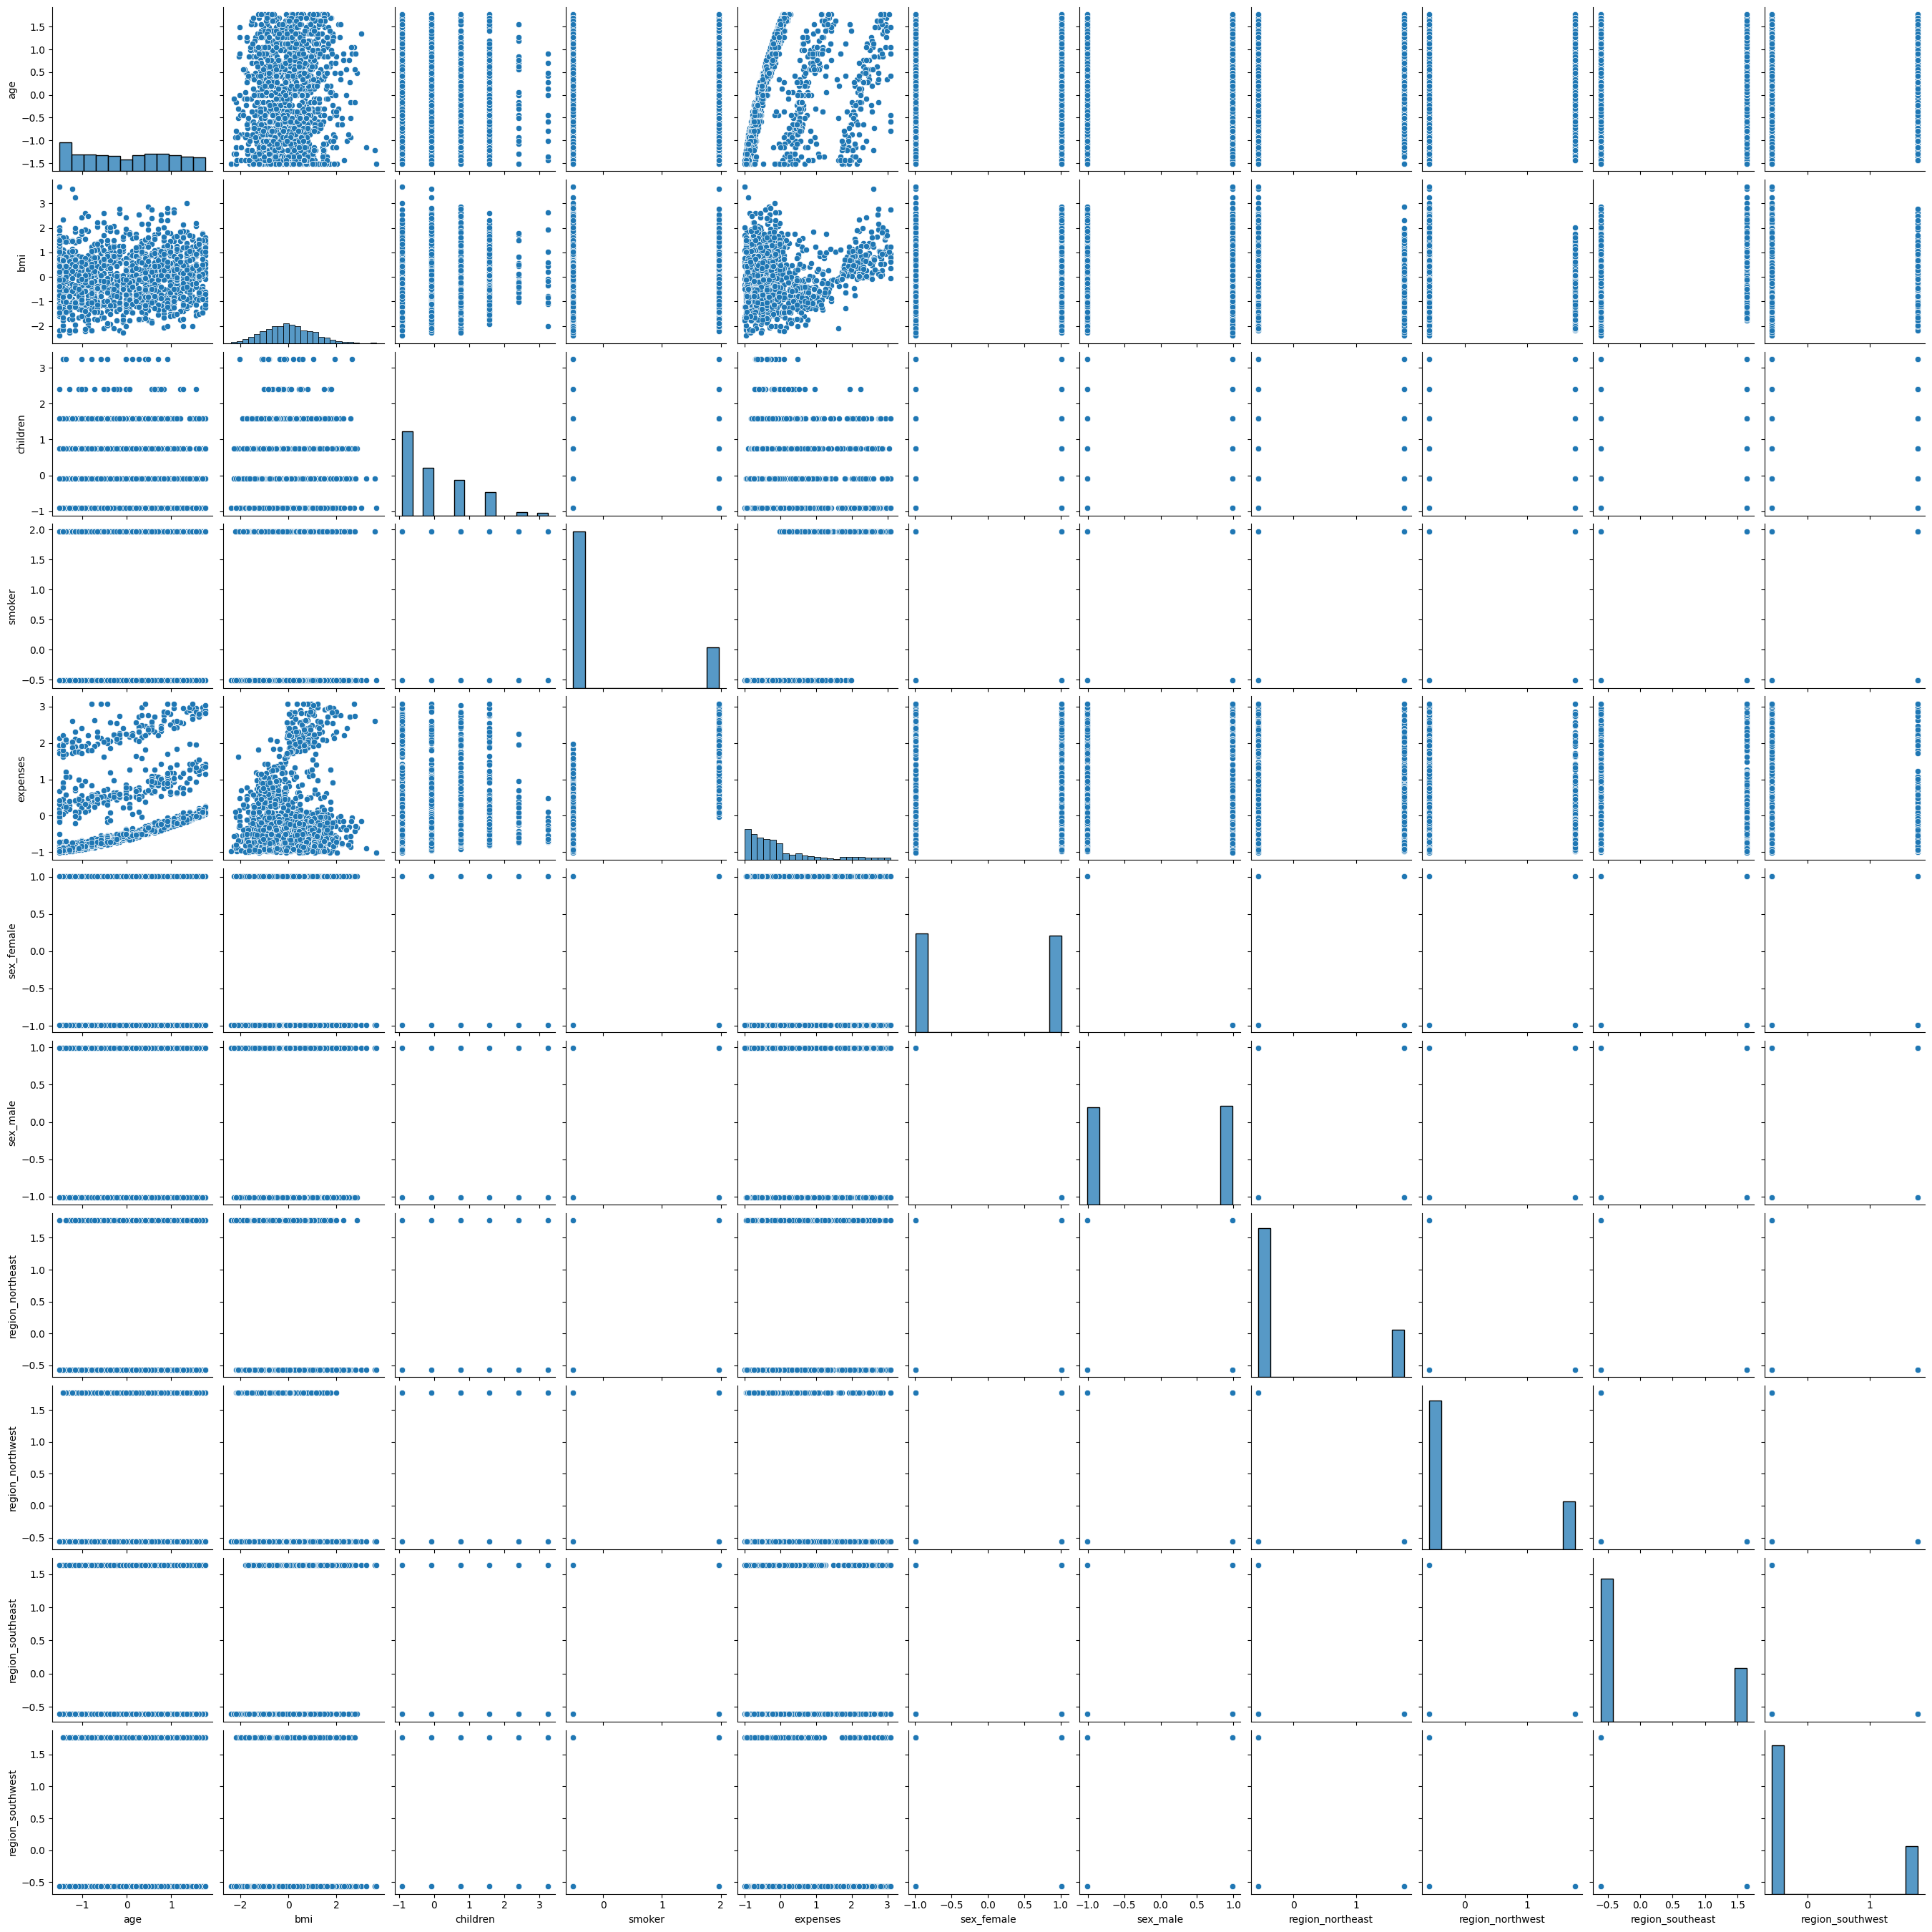

In [62]:
sns.pairplot(df)
plt.show()

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Y = df['expenses']
X = df.drop(columns=['expenses'])


x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=22)

In [91]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [92]:
reg.score(x_test, y_test), reg.score(x_train, y_train)

(0.7618914983009217, 0.753986848381808)

In [93]:
y_pred = reg.predict(x_test)
y_pred

array([ 8.24347463e-01,  3.46882962e-01, -2.50807575e-01,  3.39811044e-02,
       -9.35329651e-01,  2.60023444e-01, -1.56313715e-02,  1.90900829e+00,
        1.50338657e+00, -2.57948153e-01, -6.39088224e-01,  1.14353345e+00,
       -1.17486447e-01, -3.51510025e-01, -6.40641226e-01,  6.38468705e-02,
       -8.02968498e-01, -4.48918116e-01, -8.57645901e-01, -1.86498282e-01,
        2.25605371e-01, -8.17244750e-01,  2.08424575e-01, -1.66952970e-01,
       -7.94760955e-02,  1.79900740e+00,  1.07109634e+00, -9.48406381e-02,
        1.10365465e-02, -3.14705182e-01, -3.12118827e-01, -4.46177967e-01,
       -2.05153772e-01, -6.04170072e-01, -1.05514734e-01,  1.54187229e+00,
       -9.10797772e-01,  1.50562397e+00, -5.87503620e-01,  1.63791341e+00,
       -6.19226596e-01, -2.81340661e-01, -2.75730574e-01,  4.07780569e-01,
       -6.93772111e-02, -6.37417346e-01, -1.61204104e-01, -2.69756346e-01,
        2.05641789e+00, -8.23826915e-02, -1.13468773e+00, -6.77980332e-01,
        1.79961315e+00, -

In [94]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7618914983009217